Enter the number of data points in the dataset:  6
Enter the x-coordinate of point 1:  32
Enter the y-coordinate of point 1:  200
Enter the label (N=0 orY=1) 1:  1
Enter the x-coordinate of point 2:  45
Enter the y-coordinate of point 2:  350
Enter the label (N=0 orY=1) 2:  0
Enter the x-coordinate of point 3:  28
Enter the y-coordinate of point 3:  150
Enter the label (N=0 orY=1) 3:  0
Enter the x-coordinate of point 4:  50
Enter the y-coordinate of point 4:  500
Enter the label (N=0 orY=1) 4:  1
Enter the x-coordinate of point 5:  35
Enter the y-coordinate of point 5:  250
Enter the label (N=0 orY=1) 5:  1
Enter the x-coordinate of point 6:  40
Enter the y-coordinate of point 6:  300
Enter the label (N=0 orY=1) 6:  0
Enter the value of k:  3
Enter the x-coordinate of the new point:  34
Enter the y-coordinate of the new point:  275


The new point [ 34. 275.] is classified as label: 1.0


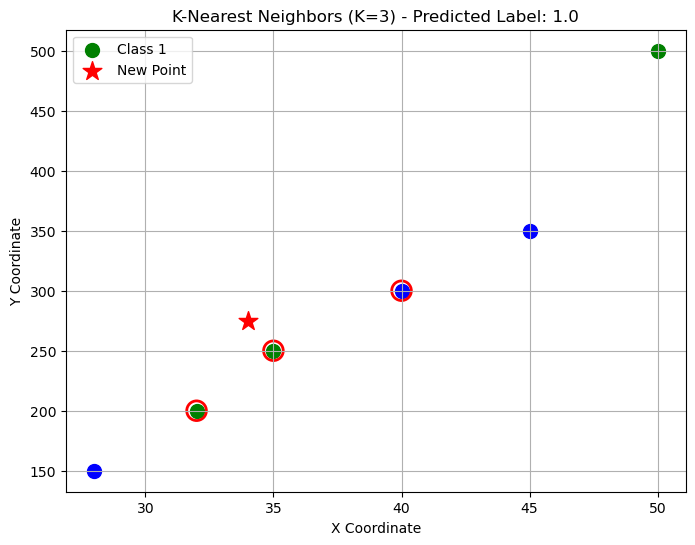

In [26]:
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

# calculate Euclidean distance
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def knn(dataset, new_point, k):
    distances = []
    
   
    for data_point in dataset:
        point_coords = data_point[:2]
        label = data_point[2]
        distance = euclidean_distance(point_coords, new_point)
        distances.append((distance, label, point_coords))

    distances.sort(key=lambda x: x[0])
    k_nearest_neighbors = distances[:k]

    labels = [neighbor[1] for neighbor in k_nearest_neighbors]
    most_common = Counter(labels).most_common(1)

    return most_common[0][0], k_nearest_neighbors

def new_dataset():
    dataset = []
    num_points = int(input("Enter the number of data points in the dataset: "))
    
    for i in range(num_points):
        x = float(input(f"Enter the x-coordinate of point {i + 1}: "))
        y = float(input(f"Enter the y-coordinate of point {i + 1}: "))
        label = int(input(f"Enter the label (N=0 orY=1) {i + 1}: "))
        dataset.append([x, y, label])
    
    return np.array(dataset)
    
def K_clusters():
    k = int(input("Enter the value of k: "))
    
    # condition for k is even or odd
    if k % 2 == 0:
        print(f"The value of k = {k} is even. To avoid ties, using k = {k+1} (next odd number).")
        k += 1
    return k

dataset = new_dataset()

k = K_clusters()
#input points that you have to calculate
new_point = np.array([float(input("Enter the x-coordinate of the new point: ")), 
                      float(input("Enter the y-coordinate of the new point: "))])

predicted_label, neighbors = knn(dataset, new_point, k)

print(f"The new point {new_point} is classified as label: {predicted_label}")

# Plot the dataset
plt.figure(figsize=(8, 6))

# Plot points
for data_point in dataset:
    x, y, label = data_point
    if label == 0:
        plt.scatter(x, y, color='blue', label='Class 0' if label == 0 and not plt.gca().has_data() else '', s=100)
    else:
        plt.scatter(x, y, color='green', label='Class 1' if label == 1 and not plt.gca().has_data() else '', s=100)

for neighbor in neighbors:
    plt.scatter(neighbor[2][0], neighbor[2][1], facecolors='none', edgecolors='red', s=200, linewidths=2, label='Neighbor' if not plt.gca().has_data() else '')

plt.scatter(new_point[0], new_point[1], color='red', label='New Point', marker='*', s=200)

plt.title(f"K-Nearest Neighbors (K={k}) - Predicted Label: {predicted_label}")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.legend(loc='upper left')

# graph plot
plt.grid(True)
plt.show()
